# Pytorch 101

In [ ]:
import torch
import numpy as np

In [ ]:
tensor_2d = torch.randn(3,4)
tensor_2d

In [ ]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

In [ ]:
np1 = np.random.rand(4,5)
my_tensor = torch.tensor(np1)
my_tensor
# tensors are by default float32, but can 

## Tensor Ops

In [ ]:
import torch

In [ ]:
my_torch = torch.arange(10)
my_torch

In [ ]:
# Reshape and View
my_torch = my_torch.reshape(2,5)
my_torch
# Reshape if we dont know the number of items and udo that use -1
my_torch = my_torch.reshape(-1, 5)
my_torch

In [ ]:
my_torch2 = torch.arange(10)
my_torch3 = my_torch2.reshape(2,5)

In [ ]:
my_torch3

In [ ]:
my_torch2[1] = 4141
my_torch2

In [ ]:
my_torch3

In [ ]:
my_torch4 = torch.arange(10)
my_torch4

In [ ]:
my_torch4[4]

In [ ]:
# Grab slice
my_torch5 = torch.arange(10)
my_torch6 = my_torch5.reshape(5,2)
my_torch6[:,1]

In [ ]:
my_torch6[:,1:]

## Tensor Math Operations

In [ ]:
import torch
import numpy as np

In [ ]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [ ]:
tensor_a + tensor_b

In [ ]:
torch.add(tensor_a, tensor_b)

In [ ]:
tensor_b - tensor_a

In [ ]:
torch.sub(tensor_b, tensor_a)

In [ ]:
tensor_a * tensor_b

In [ ]:
torch.mul(tensor_a, tensor_b)

In [ ]:
tensor_b/tensor_a

In [ ]:
torch.div(tensor_b, tensor_a)

In [ ]:
tensor_b % tensor_a

In [ ]:
torch.remainder(tensor_b, tensor_a)

In [ ]:
# Exponenstial power
print([1**5, 2**6, 3**7, 4**8])
torch.pow(tensor_a, tensor_b)

In [ ]:
tensor_a.add(tensor_b)

In [ ]:
tensor_a.add_(tensor_b)
tensor_a

# Build Simple Neural Network with PyTorch

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Create a Model Class that inherits from nn.Module
class Model(nn.Module):
    # Input Layer (4 features of the flower) --> 
    # Hiddenlayer 1 H1 (number of neurons) --> 
    # H2 (n number of neurons) --> 
    # Output Layer (3 classes of the flower)

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1) # Input to H1
        self.fc2 = nn.Linear(h1, h2)          # H1 to H2
        self.out = nn.Linear(h2, out_features) # H2 to Output Layer
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) # Do something, if the output of something is <-, use 0, else use the output
        x = F.relu(self.fc2(x))
        x = self.out(x) # Final Layer, no activation function
        return x

In [ ]:
# create a manual seed for randomness
torch.manual_seed(41)
# Create an instance of the model
model = Model()

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.tail()

In [ ]:
# Change last column from strings to integers
my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
my_df

In [ ]:
# Train and Test Split and make X and y as numpy arrays
X = my_df.drop('species', axis=1).values
y = my_df['species'].values
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train) #LongTensor for classification, longtensors are 64 bit integers
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the creiterion to measure the error
criterion = nn.CrossEntropyLoss()
# Choose an optimizer, learning rate, lr = 0.01 if error doesnt go down after epochs, lower the lr. The lower lr, the longer it takes to run
optimizer = torch.optim.Adam((model.parameters()), lr = 0.01)

In [ ]:
# Define the number of epochs
# Epoch is one run through all the the training data
epochs = 100
losses = [] # append losses as we go through the epochs
for i in range(epochs):
    # Go forward pass and get a prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss
    loss = criterion(y_pred, y_train) # Compare predicted results to actual results

    # Keep track of losses
    losses.append(loss.detach().numpy())

    # print every 10 epochs
    if i%10==0:
        print(f'Epoch: {i} Loss: {loss}')
    
    # Do some backporpagation: Take the error rate from forward propagation and feed it back through the network to fine tune the weights.
    optimizer.zero_grad() # clears the old gradient values, ensuring gradients from the previous iterations don’t accumulate.

    loss.backward() # Performs backpropagation to calculate the new gradients of the loss with respect to each parameter (weights).
    optimizer.step() # Uses the calculated gradients to update the model's parameters, moving them toward values that minimize the loss.



In [ ]:
# Graph the losses
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
# Evaluate the model on test dataset
with torch.no_grad(): # Turn off backpropagation, since learning is not required, only evaluation with test data
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
loss


In [ ]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        # Will tell us which of the 3 classes has the highest value
        print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got correct {correct} out of {len(y_test)}')

In [ ]:
new_iris = torch.tensor([[4.7, 3.2, 1.3, 0.2]])

In [ ]:
with torch.no_grad():
    y_new = model.forward(new_iris)
    print(y_new, y_new.argmax().item())
    

In [ ]:
# Save our NN Model
torch.save(model.state_dict(), 'basi_nn_iris_model.pt')

In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('basi_nn_iris_model.pt'))

In [ ]:
new_model.eval() # Put the model in evaluation mode

# Convolutional Neural Networks with PyTorch

**Loading MNIST Dataset for CNNs and classify digits**

image filter nad kerner are the samething.
apply that filter to the image to get feautres. The filter is applied on every matrix, and the number are added up to get a single number. This is called convolution operation.
This filter is dragged over the entire image to get an output

The filter is actually weights. Then it will convvolute and stride across the image.
Sometimes we want to change stride length.

In CNN the neurons are connected to only a small region of the previous layer. This is called local receptive field. --> locally connected.
in ANN, all neurons are connected to all neurons in the previous layer. --> fully connected.

After the local receptive field, which is convolution, there is pooling.

When color images are in usd, the images are 3D and the filters are also 3D. So there is 3d tensors. The coloir is split into multiple layers --> 3 color channel (RGB). Each channel intenstiy determines what color overall the image is.
Each channel is a filter layer.

The very last stage of CNN, there will be a fully connected layer.

Pooling layer:
Takes all the inputs from the convolution layer and reduced them.
This can be done with a regular NN. too, but it touwld take too long and many more parameters.
Reducing that happens with pooling layer.
Pooling is basically downsampling.
Methods to downsample opr pooling: max and average pooling
Drag a filter across, set a window, set a stride length.
max pooling: across the widnows, takes the max values. All the other values disappear.

From pooling layer, a whole new convolution layer can be created.
And then another pooling layer can be created.

Average pooling: The sums are averaged instead of taking the max.

Later they get flattneed out as flatten layer, then a full connected layers to get the output.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# convert mnist image files into tensor of 4-dimensions (num of images, height, weidth, color channel)
transform = transforms.ToTensor()

In [3]:
# Train data
train_data = datasets.MNIST(root='cnn_data', train=True, download=True, transform = transform)

In [4]:
# Test data
test_data = datasets.MNIST(root='cnn_data', train=False, download=True, transform = transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
# create a small batch size of images
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

## Test with One Image

In [ ]:
# Define CNN model
# Describe convolutional layer and what it's doing (2 convolutional layers)
# This is just an example
conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)

In [ ]:
# grab 1 mnist record
for i, (X_train, y_train) in enumerate(train_data):
    break

In [ ]:
X_train.shape

In [ ]:
x = X_train.view(1,1,28,28) #

In [ ]:
# Perform first conv
x =F.relu(conv1(x)) # rectified linear unit for activation function

In [ ]:
# 1 single image, 6 is filters or channels, 26x26 is the image.
# padding is outsife of the image. In the mnist data, the digit is in the middle. We didnt define any padding.  Since padding is off,  the conv removes non-informatory parts of the image.
x.shape

In [ ]:
# pass through the pooling layer
x = F.max_pool2d(x, 2,2) # kernel of 2 and stride of o2

In [ ]:
# 1 is i 1 image, 6 is number of features, 13x13 , because 26/2 is 13 as the pooling layer downsamples the image by 2x2
x.shape

In [ ]:
# Do our second conv layer
x = F.relu(conv2(x))

In [ ]:
# 1 is i 1 image, 16 is number of features, 11x11 , because 13-3+1 = 11 (no padding, stride of 1); 3 is the kernel size of the conv2 layer
x.shape

In [ ]:
#pooling layer
x = F.max_pool2d(x, 2,2)

In [ ]:
# 11/2 = 5.5, but we have round down since we cant rounded up half pixel, but we have deleted data in pooling
x.shape
# 28-2/2-2/2 ==> 5.5

## Model Class

In [8]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)
        # Fully connected layers
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # 10 output classes for mnist
    
    def forward(self, x):
        X = F.relu(self.conv1(x))
        X = F.max_pool2d(X, 2,2) # 2x2 kernel and stride of 2
        # Second pass
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2,2) # 2x2 kernel and stride of 2

        # Re-View to flatten it out
        X = X.view(-1,16*5*5) # negative one so that we can vary the batch size

        # Fully connected layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X) # Final layer, no activation function
        return F.log_softmax(X, dim=1) # log softmax for classification

`self.fc1 = nn.Linear(5*5*16, 120)`
comes from the output size of the feature maps after passing through the convolutional and pooling layers in your convolutional neural network (CNN). Here's how it is calculated:

Input Size: The input to the first convolutional layer (conv1) is a single-channel image (e.g., a grayscale image) of size $$(28 \times 28)$$ pixels (for MNIST).

First Convolution Layer (conv1):

Kernel Size: The kernel size is $$(3 \times 3)$$.
Stride: The stride is (1).
Output Size Calculation:
The output size after the convolution can be calculated using the formula: $$[ \text{Output Size} = \frac{\text{Input Size} - \text{Kernel Size}}{\text{Stride}} + 1 ]$$
For the first convolution: $$[ \text{Output Height/Width} = \frac{28 - 3}{1} + 1 = 26 ]$$
So, the output from conv1 is $$(26 \times 26)$$ with $$(6)$$ output channels (filters).
First Pooling Layer:

Pooling Size: The pooling size is $$ (2 \times 2)$$ with a stride of (2).
Output Size Calculation:
The output size after pooling is: 

$$ \text{Output Size} = \frac{\text{Input Size}}{\text{Pooling Size}} = \frac{26}{2} = 13 $$

So, after the first pooling layer, the output size is $$(13 \times 13)$$ with (6) channels.
Second Convolution Layer (conv2):

Input Size: The input to conv2 is $$(13 \times 13)$$ with (6) channels.
Output Size Calculation:
Using the same formula: $$[ \text{Output Size} = \frac{13 - 3}{1} + 1 = 11 ]$$
So, the output from conv2 is $$(11 \times 11)$$ with (16) output channels.
Second Pooling Layer:

Output Size Calculation:
After pooling: $$[ \text{Output Size} = \frac{11}{2} = 5.5 \quad \text{(rounded down to 5)} ]$$
So, after the second pooling layer, the output size is $$(5 \times 5)$$ with (16) channels.
Final Calculation:
Thus, when you flatten the output to feed into the fully connected layer, the total number of input features is: $$[ 5 \times 5 \times 16 = 400 ]$$

This is why you see $$5*5*16$$ in the definition of self.fc1.

In [9]:
# Create an Instance of our Model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [10]:
# Loss function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # smaller lr, longer it takes to run/train

In [11]:
import time
start_time = time.time()

# Create variables to track stuff
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Create a for loop of epochs

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    #Train
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1 # start our batches at 1
        y_pred = model(X_train) # just geting predicted values from the training data. Not flattened, its 2D.
        loss = criterion(y_pred, y_train) # compare predicted values to actual values

        predicted = torch.max(y_pred.data, 1)[1] # get the index of the max value, which is the predicted class
        batch_corr = (predicted == y_train).sum() # check how many we got correct
        train_corr += batch_corr # add to the running total. Keep track as we go along in training

        # Update our parameters
        optimizer.zero_grad() # clear the old gradients
        loss.backward() # do backpropagation
        optimizer.step() # update the weights

        if b%600 == 0:
            print(f'Epoch: {i}. Batch: {b}. Loss: {loss.item()}')
    train_losses.append(loss)
    train_correct.append(train_corr)

    # test
    with torch.no_grad(): # No gradiet so we dont update our weights and biases with test data
        for b,(X_test, y_test) in enumerate(test_loader):
            y_val = model.forward(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum() # check how many we got correct in test data

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)

current_time = time.time()
total_time = current_time - start_time
print(f'Training took: {total_time/60} minutes')

Epoch: 0. Batch: 600. Loss: 0.16236093640327454
Epoch: 0. Batch: 1200. Loss: 0.1602664589881897
Epoch: 0. Batch: 1800. Loss: 0.49889492988586426
Epoch: 0. Batch: 2400. Loss: 0.12522068619728088
Epoch: 0. Batch: 3000. Loss: 0.00503339571878314
Epoch: 0. Batch: 3600. Loss: 0.29901862144470215
Epoch: 0. Batch: 4200. Loss: 0.004055981058627367
Epoch: 0. Batch: 4800. Loss: 0.002832361962646246
Epoch: 0. Batch: 5400. Loss: 0.044863127171993256
Epoch: 0. Batch: 6000. Loss: 0.0004838549648411572
Epoch: 1. Batch: 600. Loss: 0.0038436558097600937
Epoch: 1. Batch: 1200. Loss: 0.2452654391527176
Epoch: 1. Batch: 1800. Loss: 0.0021455746609717607
Epoch: 1. Batch: 2400. Loss: 0.0020647821947932243
Epoch: 1. Batch: 3000. Loss: 0.01047687977552414
Epoch: 1. Batch: 3600. Loss: 0.48746323585510254
Epoch: 1. Batch: 4200. Loss: 0.03550829365849495
Epoch: 1. Batch: 4800. Loss: 0.0007084232638590038
Epoch: 1. Batch: 5400. Loss: 0.0004542754904832691
Epoch: 1. Batch: 6000. Loss: 0.14723631739616394
Epoch: 2.

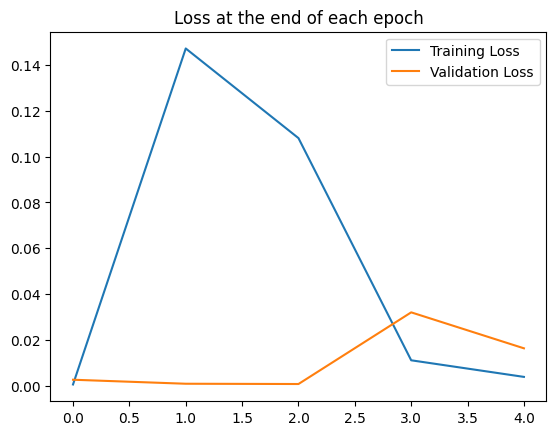

In [12]:
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at the end of each epoch')
plt.legend()

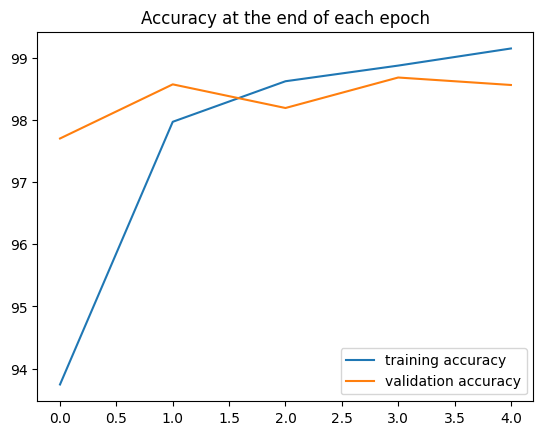

In [13]:
# Graph accuracy
plt.plot([t/600 for t in train_correct],label = 'training accuracy')
plt.plot([t/100 for t in test_correct],label = 'validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [14]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [16]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_everything:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [19]:
correct.item()/len(test_data)*100

98.56

In [20]:
# Grab an image
test_data[4143] # tesnsor with an image in it

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [22]:
# Grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [23]:
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

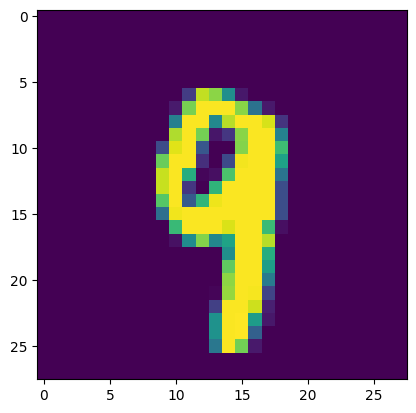

In [25]:
plt.imshow(test_data[4143][0].reshape(28, 28))

In [26]:
# pass image through model
model.eval()
with torch.no_grad():
    new_pred = model(test_data[4143][0].view(1,1,28,28)) # batch size 1, 1 color channel, 28*28 image

In [27]:
new_pred

tensor([[-2.1651e+01, -1.9919e+01, -2.3054e+01, -1.5038e+01, -9.0582e+00,
         -1.6630e+01, -3.2200e+01, -1.4134e+01, -1.2301e+01, -1.2218e-04]])

In [28]:
new_pred.argmax()

tensor(9)